# Step 1: Import necessary libraries

In [ ]:
import pandas as pd

# Step 2: Load the dataset

In [ ]:
dataset = pd.read_csv("/content/Housing.csv")

# Step 3: Data Exploration and Preprocessing

In [ ]:
# Display the first few rows of the dataset
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## **Data Cleaning**

In [ ]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# Handle missing values (if necessary)
# For example, to remove rows with missing values:
dataset.dropna(inplace=True)

In [ ]:
# Creating a manual dataset
data = pd.DataFrame({
    'name': ['John', 'Jane', 'Jack', 'John', None],
    'age': [28, 34, None, 28, 22],
    'purchase_amount': [100.5, None, 85.3, 100.5, 50.0],
    'date_of_purchase': ['2023/12/01', '2023/12/02', '2023/12/01', '2023/12/01', '2023/12/03']
	})

data.head()

,name,age,purchase_amount,date_of_purchase
0,John,28.0,100.5,2023/12/01
1,Jane,34.0,NaN,2023/12/02
2,Jack,NaN,85.3,2023/12/01
3,John,28.0,100.5,2023/12/01
4,None,22.0,50.0,2023/12/03


In [ ]:
data.isnull().sum()

,0
name,1
age,1
purchase_amount,1
date_of_purchase,0


In [ ]:
data.describe()

,age,purchase_amount
count,4.000000,4.000000
mean,28.000000,84.075000
std,4.898979,23.819932
min,22.000000,50.000000
25%,26.500000,76.475000
50%,28.000000,92.900000
75%,29.500000,100.500000
max,34.000000,100.500000


In [ ]:
from sklearn.impute import SimpleImputer

# Handling missing values using mean imputation for 'age' and 'purchase_amount'
imputer = SimpleImputer(strategy='mean')
data[['age', 'purchase_amount']] = imputer.fit_transform(data[['age', 'purchase_amount']])

In [ ]:
data.head()

,name,age,purchase_amount,date_of_purchase
0,John,28.0,100.500,2023/12/01
1,Jane,34.0,84.075,2023/12/02
2,Jack,28.0,85.300,2023/12/01
3,John,28.0,100.500,2023/12/01
4,None,22.0,50.000,2023/12/03


In [ ]:
data.shape

(5, 4)

In [ ]:
# Removing duplicate rows
data = data.drop_duplicates()

In [ ]:
data.shape

(4, 4)

In [ ]:
# Binning method for data discretisation


import numpy as np

# Generate some example data
data = np.random.rand(100)
# Define the number of bins
num_bins = 10
# Use numpy's histogram function for equal width bins
hist, bins = np.histogram(data, bins=num_bins)

In [ ]:
hist, bins

(array([ 8, 14,  7,  7, 10, 13, 10, 13, 10,  8]),
 array([0.00385305, 0.10303471, 0.20221637, 0.30139802, 0.40057968,
        0.49976134, 0.598943  , 0.69812466, 0.79730631, 0.89648797,
        0.99566963]))

## **Data Integration**

In [ ]:
# Creating two manual datasets
data1 = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['John', 'Jane', 'Jack'],
    'age': [28, 34, 29]
})

data2 = pd.DataFrame({
    'customer_id': [1, 3, 4],
    'purchase_amount': [100.5, 85.3, 45.0],
    'purchase_date': ['2023-12-01', '2023-12-02', '2023-12-03']
})

data1.head()

,customer_id,name,age
0,1,John,28
1,2,Jane,34
2,3,Jack,29


In [ ]:
data2.head()

,customer_id,purchase_amount,purchase_date
0,1,100.5,2023-12-01
1,3,85.3,2023-12-02
2,4,45.0,2023-12-03


In [ ]:
# Merging datasets on a common key 'customer_id'
merged_data = pd.merge(data1, data2, on='customer_id', how='inner')
merged_data.head()

,customer_id,name,age,purchase_amount,purchase_date
0,1,John,28,100.5,2023-12-01
1,3,Jack,29,85.3,2023-12-02


## **Data Transformation**

In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Convert categorical variables to numeric using one-hot encoding
dataset_ohe = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


In [ ]:
dataset_ohe

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [ ]:
dataset[['mainroad', 'guestroom', 'basement', 'hotwaterheating', \
                                            'airconditioning', 'prefarea', 'furnishingstatus']]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [ ]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
# encoder.fit(dataset[['mainroad', 'guestroom', 'basement', 'hotwaterheating',
#                                            'airconditioning', 'prefarea', 'furnishingstatus']])
# dataset_cat = encoder.transform(dataset[['mainroad', 'guestroom', 'basement', 'hotwaterheating',
#                                            'airconditioning', 'prefarea', 'furnishingstatus']])

encoded_data = pd.DataFrame(encoder.fit_transform(dataset[['mainroad', 'guestroom', 'basement', 'hotwaterheating', \
                           'airconditioning', 'prefarea', 'furnishingstatus']]),
                            columns=encoder.get_feature_names_out())

In [ ]:
# Scaling numeric data
scaler = StandardScaler()
dataset['area_scaled'] = scaler.fit_transform(dataset[['area']])

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
dataset['area_scaled_minmax'] = scaler.fit_transform(dataset[['area']])


In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_scaled,furnishingstatus_le,area_scaled_minmax
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.046726,0,0.396564
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.757010,0,0.502405
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,2.218232,1,0.571134
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1.083624,0,0.402062
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1.046726,0,0.396564


In [ ]:

dataset.area_scaled_minmax

,area_scaled_minmax
0,0.396564
1,0.502405
2,0.571134
3,0.402062
4,0.396564
...,...
540,0.092784
541,0.051546
542,0.135395
543,0.086598


In [ ]:
ddataset.area_scaled.std()

1.0009186956462133

In [ ]:

dataset.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_scaled
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.046726
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.757010


In [ ]:
mapping = {
    'John':1,
    'Jack':2,
    'Jane':3
}

In [ ]:
data.name.map(mapping)

,name
0,1.0
1,3.0
2,2.0
3,1.0
4,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['furnishingstatus_le'] = le.fit_transform(dataset['furnishingstatus'])

## **Data Reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

# Creating a manual dataset
data = pd.DataFrame({
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [1, 2, 3, 4, 5],
    'feature3': [100, 200, 300, 400, 500],
    'target': [0, 1, 0, 1, 0]
	})

# Feature selection using SelectKBest
selector = SelectKBest(f_regression, k=2)
selected_features = selector.fit_transform(data[['feature1', 'feature2', 'feature3']], data['target'])

# Printing selected features
print("Selected features (SelectKBest):")
print(selected_features)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['feature1', 'feature2', 'feature3']])

# Printing PCA results
print("PCA reduced data:")
print(pca_data)

Selected features (SelectKBest):
[[10  1]
 [20  2]
 [30  3]
 [40  4]
 [50  5]]
PCA reduced data:
[[-2.01007463e+02 -2.69618663e-15]
 [-1.00503731e+02  8.98728878e-16]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 1.00503731e+02 -8.98728878e-16]
 [ 2.01007463e+02 -1.79745776e-15]]


# Step 4: Define the target and input features

In [ ]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'area_scaled',
       'furnishingstatus_le', 'area_scaled_minmax'],
      dtype='object')

In [ ]:
dataset = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first = True)

X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes',
             'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes',
             'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = dataset['price']

In [ ]:
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories']]
y = dataset['price']

When do we go for simple linear regression model?

1. **Target variable** - Categorical or Continuous ? - Here we have **continuous variable**

2. **Independent variables are having linear relationship with Target variable**. Validate this during EDA phase

3. **Independence** - Each example/observation is independent of other example/observation ( target value of 1 example do not depend on target value of another example )

4. **Homoscedasticity** -  Variance of error has to be uniform across entire spectrum of predicted values. If not uniform, then it is called heteroskedasticity

5. **Normality**: The residuals should be normally distributed.

We can validate 4th and 5th after applying model.



# Step 5: Data Splitting

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Linear Regression Modeling

# **Linear regression model**

https://www.geeksforgeeks.org/ml-linear-regression/

**Y = mX + C**

Y is the predicted value of the dependent variable for any given value of the independent variable

C is the intercept, the predicted value of y when the x is 0.
m is the regression coefficient – how much we expect y to change as x increases.
X is the independent variable ( the variable we expect is influencing y).

In our prediction, we will have some error -
the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

Notes -
m, C -> Model's parameters, Model Coefficients etc

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 7: Model Evaluation

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'MAE: {mae:.2f}')
#print(f'RMSE: {rmse:.2f}')

Mean Squared Error: 1754318687330.66
R-squared: 0.65
MAE: 970043.40


# Step 8: Visualization

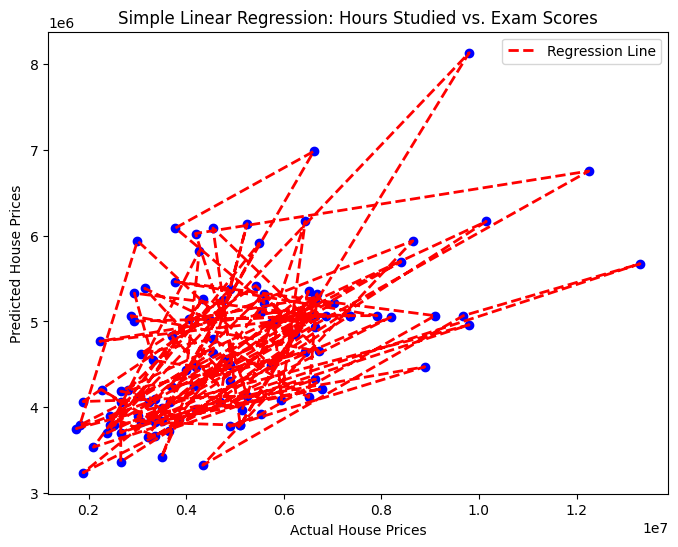

In [ ]:
# Step 8: Visualization
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_pred, color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.legend()
plt.title('Simple Linear Regression: Hours Studied vs. Exam Scores')
plt.show()

Note -


Can you predict for out of range data?

https://www.scribbr.com/statistics/simple-linear-regression/

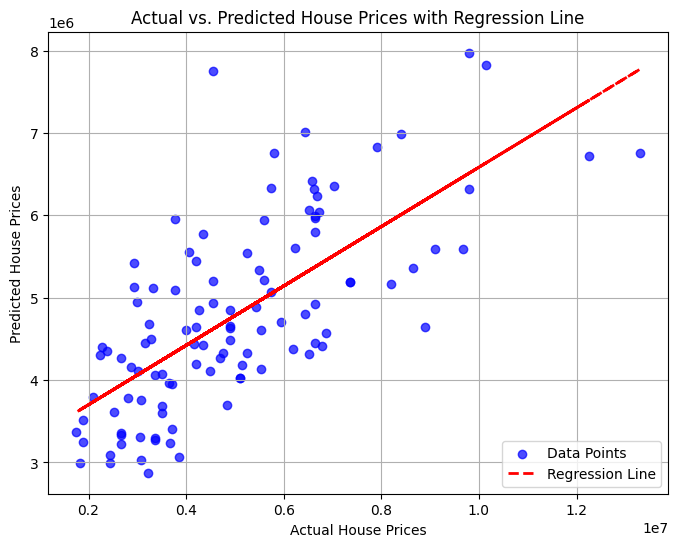

In [ ]:
# prompt: add regression line in above plot

import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code) ...

# Step 8: Visualization with Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Data Points')

# Calculate the regression line
z = np.polyfit(y_test, y_pred, 1)  # Fit a linear polynomial
p = np.poly1d(z)

# Plot the regression line
plt.plot(y_test, p(y_test), color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices with Regression Line')
plt.grid(True)
plt.legend() # Show the legend for data points and regression line
plt.show()


# Step 9: Interpretation

In [ ]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 389.23
bedrooms: 695678.67
Intercept: 642086.41


In [ ]:
Y = 389*area + 695678*bedrooms + 642086

In [ ]:
425.73*5900 + 2512254.26


5024061.26

In [ ]:
y_pred

array([5024060.33139816, 5279498.23656143, 4232202.82539203,
       4640903.47365326, 4198144.43803692, 5373158.80178796,
       6139472.51727777, 4636646.17523387, 3891618.951841  ,
       3661724.83719406, 6165016.3077941 , 4187075.46214652,
       4095969.27597162, 3832016.77396957, 4202401.73645631,
       4057653.59019713, 3363713.94783691, 5066633.31559204,
       5002773.83930122, 5066633.31559204, 4649418.07049203,
       5417860.43519154, 4065742.45719396, 4130027.66332672,
       6024525.4599543 , 6752523.48966962, 3827759.47555018,
       3789443.78977569, 8131888.17755128, 3789443.78977569,
       4215173.63171447, 3840531.37080835, 5066633.31559204,
       5328457.16838439, 4545114.25921703, 4470611.53687774,
       4490195.10960693, 3866075.16132467, 3993794.11390631,
       3698763.33344273, 5909578.40263083, 4057653.59019713,
       5245439.84920633, 4300319.60010223, 5385930.69704613,
       5017674.38376908, 5066633.31559204, 4487640.7305553 ,
       5939379.49156655,

In [ ]:
X_test

,area
316,5900
77,6500
360,4040
90,5000
493,3960
...,...
15,6000
357,6930
39,6000
54,6000


Coefficient - + / - ?

Interpretation - Single unit change in X, increases/decreases Y by value which is coefficient value

# **Assumptions for multiple linear regression**

All assumptions of simple regression holds + below are additional

1. No multi-collinearity
2. Additivity: This assumption implies that there is no interaction between variables in their effects on the dependent variable.
3. Feature selection - Include only relevant variables

# **Linear regression recap**

- Target variable?
- Kind of relationship between independent variable vs dependent variable?
- Simple linear regression vs Multiple linear regression ?
- 5 assumptions?
- One Hot encoding vs Dummy encoding?
- Linear regression tries to minimise which error ? MSE or MAE
- R squared meaning?
- Algorithm / Process to find out m and c ( model parameters ) - ?
- Meaning of m and c after interpretation ?

# **R Squared vs Adjusted R Squared**

R Squared = 1 - SSres/SStot

Adjusted R Squared = 1 - (1-R2)*(n-1)/(n-k-1)

k = No of Independent variables in model
n = No of data points ( sample size )

as K increases, denominator decreases & ratio of (n-1)/(n-k-1) increases and when it is subtracted from 1, the number would decrease(penalised) if there is no signifcant change in R squared.

# **How to find out m and c?**

Go:- https://www.mladdict.com/linear-regression-*simulator*